# Exam lab 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

In [2]:
n1 = 240
an1 = np.empty(n1+1)
n1arr = np.arange(0,n1+1)
an1[0] = 100000
r1 = 1.005
b1 = -716.43

### Part (a)

In [3]:
for i in range(0,n1+1):
    if i > 0:
        an1[i] = r1*an1[i-1] + b1
    #print('For i =', i, ', an =', an1[i])
print('Amount left in last month: $', round(an1[n1],2))

Amount left in last month: $ 0.49


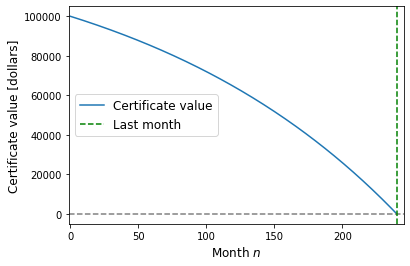

In [4]:
plt.plot(n1arr, an1, '-', label='Certificate value');
plt.axhline(0, linestyle='--', color='gray');
plt.axvline(240, linestyle='--', color='green', label='Last month');
plt.xlabel(r'Month $n$', fontsize=12);
plt.ylabel('Certificate value [dollars]', fontsize=12);
plt.xlim([-1,n1+5]);
plt.legend(fontsize=12);

### Part (b)

Amount such that you can draw \$1000 every month without changing the amount in the account.

In [5]:
b1b = -1000.0
eq1 = b1b/(1-r1)
print('Initial deposit =', round(eq1,2))

Initial deposit = 200000.0


In [6]:
an1b = np.empty(n1+1)
an1b[0] = eq1
for i in range(0,n1+1):
    if i > 0:
        an1b[i] = r1*an1b[i-1] + b1b
    #print('For i =', i, ', an =', an1[i])
print('Amount left in last month: $', round(an1b[n1],2))

Amount left in last month: $ 200000.0


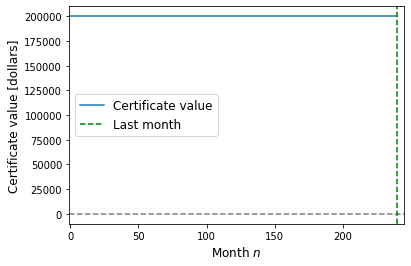

In [7]:
plt.plot(n1arr, an1b, '-', label='Certificate value');
plt.axhline(0, linestyle='--', color='gray');
plt.axvline(240, linestyle='--', color='green', label='Last month');
plt.xlabel(r'Month $n$', fontsize=12);
plt.ylabel('Certificate value [dollars]', fontsize=12);
plt.xlim([-1,n1+5]);
plt.legend(fontsize=12);

In [8]:
an1b_1 = np.empty(n1+1)
an1b_2 = np.empty(n1+1)
an1b_1[0] = eq1 - 100
an1b_2[0] = eq1 + 100
for i in range(0,n1+1):
    if i > 0:
        an1b_1[i] = r1*an1b_1[i-1] + b1b
        an1b_2[i] = r1*an1b_2[i-1] + b1b
    #print('For i =', i, ', an =', an1[i])
print('Amount left in last month (-\$1): $', round(an1b_1[n1],2))
print('Amount left in last month (+\$1): $', round(an1b_2[n1],2))

Amount left in last month (-\$1): $ 199668.98
Amount left in last month (+\$1): $ 200331.02


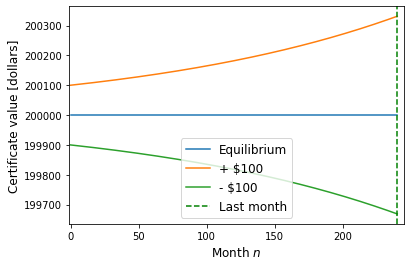

In [9]:
plt.plot(n1arr, an1b, '-', label='Equilibrium');
plt.plot(n1arr, an1b_2, '-', label='+ \$100');
plt.plot(n1arr, an1b_1, '-', label='- \$100');
#plt.axhline(0, linestyle='--', color='gray');
plt.axvline(240, linestyle='--', color='green', label='Last month');
plt.xlabel(r'Month $n$', fontsize=12);
plt.ylabel('Certificate value [dollars]', fontsize=12);
plt.xlim([-1,n1+5]);
plt.legend(fontsize=12);

## Problem 2

The code is below that I used to generate the bacteria population data over 27 days.

In [10]:
k2 = 0.0007
P2 = 500

In [11]:
n2 = 27
n2arr = np.arange(0,n2+1)
pn2 = np.empty(n2+1)
p0_pr2 = 1

In [12]:
pn2[0] = p0_pr2
for i in range(1,n2+1):
    pn2[i] = pn2[i-1] + k2*pn2[i-1]*(P2 - pn2[i-1])
    print('Population on Day', i, 'is', round(pn2[i],2))

Population on Day 1 is 1.35
Population on Day 2 is 1.82
Population on Day 3 is 2.46
Population on Day 4 is 3.31
Population on Day 5 is 4.46
Population on Day 6 is 6.01
Population on Day 7 is 8.09
Population on Day 8 is 10.87
Population on Day 9 is 14.59
Population on Day 10 is 19.55
Population on Day 11 is 26.13
Population on Day 12 is 34.79
Population on Day 13 is 46.12
Population on Day 14 is 60.78
Population on Day 15 is 79.46
Population on Day 16 is 102.85
Population on Day 17 is 131.45
Population on Day 18 is 165.36
Population on Day 19 is 204.09
Population on Day 20 is 246.37
Population on Day 21 is 290.11
Population on Day 22 is 332.73
Population on Day 23 is 371.69
Population on Day 24 is 405.07
Population on Day 25 is 431.99
Population on Day 26 is 452.56
Population on Day 27 is 467.59


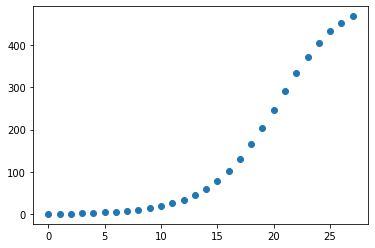

In [13]:
plt.plot(n2arr, pn2, 'o');

### Make random data and dump to file

In [14]:
# add random noise and dump to data file
#noise = 3 # 4 million ish
#pn2_data = [abs(p + noise*np.random.normal()) for p in pn2]
#plt.plot(n2arr, pn2_data, 'o');
# Delta_pn2 = np.empty(n2)
# pn2_data_without_last = pn2_data[0:n2]
# pn2_pop_term = np.empty(n2)
# for i in range(0, n2):
#     Delta_pn2[i] = pn2_data[i+1] - pn2_data[i]
#     pn2_pop_term[i] = pn2_data[i]*(P2 - pn2_data[i])
# plt.plot(pn2_pop_term, Delta_pn2, 'o');
# np.savez('exam1_pr2.npz', data = pn2_data)

## Read data and develop model

In [15]:
contents = np.load('exam1_pr2.npz')

In [16]:
contents.files

['data']

In [30]:
pn2_data = contents['data']
n2 = len(pn2_data) - 1 
n2arr = np.arange(0,n2+1)

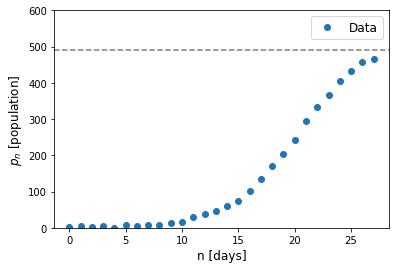

In [31]:
plt.plot(n2arr, pn2_data, 'o', label='Data');
plt.xlabel('n [days]', fontsize=12);
plt.ylabel('$p_n$ [population]', fontsize=12);
plt.axhline(490, linestyle='--', color='gray'); # using this line to estimate the carrying capacity
plt.ylim(0,600);
plt.legend(fontsize=12);

In this dynamical systems model, we are assuming the bacteria population can be represented as a continuous quantity and that it grows according to a carrying capacity model

$$ p_{n+1} = p_n + k (P-p_n)p_n $$

where $P$ is the carrying capacity. This model applies in the given time frame. A dynamical systems model also intrinsically means that we assume each step only depends on the preceding step, not on any other earlier steps.

In [38]:
P2 = 490
pn2_data_without_last = pn2_data[0:n2]
pn2_pop_term = np.empty(n2)
Delta_pn2 = np.empty(n2)
for i in range(0, n2):
    Delta_pn2[i] = pn2_data[i+1] - pn2_data[i]
    pn2_pop_term[i] = pn2_data[i]*(P2 - pn2_data[i])

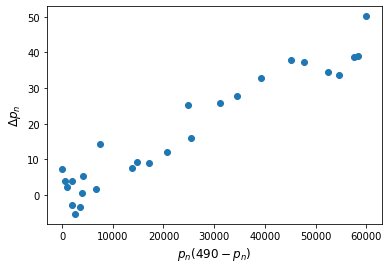

In [40]:
plt.plot(pn2_pop_term, Delta_pn2, 'o');
plt.xlabel('$p_n(490 - p_n)$', fontsize=12);
plt.ylabel('$\Delta p_n$', fontsize=12);

Estimate the slope of the proportionality using the plot of the differences vs. the proportionality amount

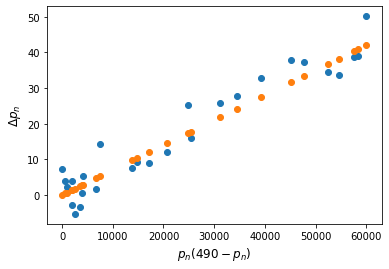

In [58]:
k2 = 0.0007 # best result I could find visually, yours may be slightly different
Delta_pn2_pred = np.empty(n2)
for i in range(0,n2):
    Delta_pn2_pred[i] = k2 * pn2_pop_term[i]
plt.plot(pn2_pop_term, Delta_pn2, 'o');
plt.plot(pn2_pop_term, Delta_pn2_pred, 'o');
plt.xlabel('$p_n(490 - p_n)$', fontsize=12);
plt.ylabel('$\Delta p_n$', fontsize=12);

Now use the developed model

$$ p_{n+1} = p_n + 0.00075 (490 - p_n)p_n $$

to make predictions and plot them against the original data loaded from the file.

In [59]:
pn2_pred = np.empty(n2+1)
pn2_pred[0] = pn2_data[0] # initialize the predictions array
for i in range(1,n2+1):
    pn2_pred[i] = pn2_pred[i-1] + k2 * (P2 - pn2_pred[i-1]) * pn2_pred[i-1]

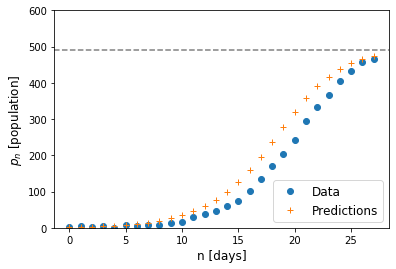

In [60]:
plt.plot(n2arr, pn2_data, 'o', label='Data');
plt.plot(n2arr, pn2_pred, '+', label='Predictions');
plt.xlabel('n [days]', fontsize=12);
plt.ylabel('$p_n$ [population]', fontsize=12);
plt.axhline(P2, linestyle='--', color='gray'); # using this line to show utilized carrying capacity
plt.ylim(0,600);
plt.legend(fontsize=12);

My prediction is ok but misses the middle somewhat. We could calculate and plot an error to see what's going on. In this case, I will use percent error because the population changes quite a bit in magnitude.

In [67]:
pn2_perc_err = np.empty(n2+1)
for i in range(0, n2+1):
    pn2_perc_err[i] = abs(pn2_data[i] -  pn2_pred[i])/pn2_data[i] * 100.0

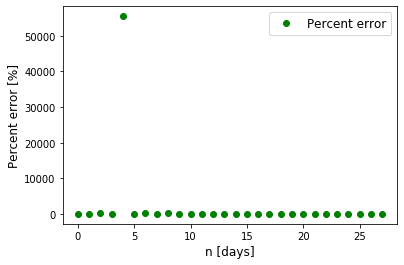

In [68]:
plt.plot(n2arr, pn2_perc_err, 'o', label='Percent error', color='green');
plt.xlabel('n [days]', fontsize=12);
plt.ylabel('Percent error [%]', fontsize=12);
plt.legend(fontsize=12);

One of the errors is much bigger than the others because it must be from an outlier. Adjust the scale on the percent error to better see the pattern.

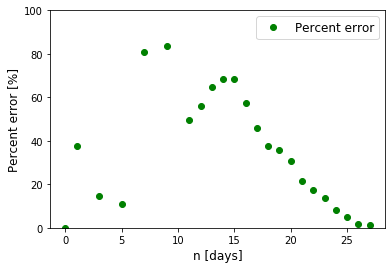

In [69]:
plt.plot(n2arr, pn2_perc_err, 'o', label='Percent error', color='green');
plt.xlabel('n [days]', fontsize=12);
plt.ylabel('Percent error [%]', fontsize=12);
plt.ylim(0,100);
plt.legend(fontsize=12);

This gives us a much better idea of the pattern of errors. The error is relatively smaller at the beginning and the end, but grows fairly large in the middle of the time period (other than the outlier point).

## Problem 3

$$ P_{n+1} = P_n - 0.1(Q_n - 500)$$

$$ Q_{n+1} = Q_n + 0.2(P_n - 100) $$

Part (a): find equilibrium values and then plot the result to prove it is correct.

You can almost read off the equilibrium from the above equations, but here is how to find it algebraically. Let $P$ and $Q$ be the equilibrium price and quantity of the item. Then

$$ P = P - 0.1(Q - 500)$$

$$ Q = Q + 0.2(P - 100) $$

subtract $P$ from both sides of the first equation and $Q$ from both sides of the second. The equations become

$$ 0 = Q - 500$$

$$ 0 = P - 100$$

So in equilibrium $P=100$ and $Q=500$.

In [70]:
k1_3 = 0.1
Qeq_3 = 500
k2_3 = 0.2
Peq_3 = 100

n3 = 50
n3arr = np.arange(0,n3+1)
P3_arr = np.empty(n3+1)
P3_arr[0] = Peq_3
Q3_arr = np.empty(n3+1)
Q3_arr[0] = Qeq_3

In [71]:
for i in range(1,n3+1):
    P3_arr[i] = P3_arr[i-1] - k1_3*(Q3_arr[i-1] - Qeq_3)
    Q3_arr[i] = Q3_arr[i-1] + k2_3*(P3_arr[i-1] - Peq_3)    

There should technically be two separate y axes on this one but let's not worry about that here.

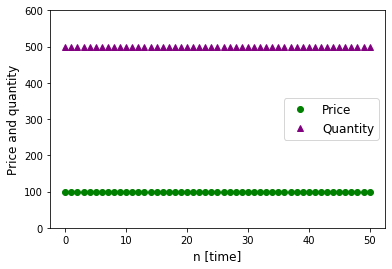

In [74]:
plt.plot(n3arr, P3_arr, 'o', label='Price', color='green');
plt.plot(n3arr, Q3_arr, '^', label='Quantity', color='purple');
plt.xlabel('n [time]', fontsize=12);
plt.ylabel('Price and quantity', fontsize=12);
plt.ylim(0, 600);
plt.legend(fontsize=12);

Yes, this is equilibrium because the amounts remain the same over time.

### Part (b)

- $-0.1$ represents how increased quantities (over 500) drive up the price. If the quantity is below 500, then the price is driven up.
- $0.2$ represents how a higher price attracts more suppliers and drives up the quantity. If the price is over 100, then this term is positive and the supply increases. If the price is less than 100, then the quantity goes down because suppliers can't get as good of a price for the item.
- $100$ represents the threshold the price must cross for more suppliers to want to stock the item. It is also the equilibrium price
- $500$ represents the threshold the quantity must cross for the price to start going down because there is oversupply. It is also the equilibrium quantity.

## Problem 4

Two arrays are provided and you must demonstrate whether or not the model

$$ y \propto x^2$$

is justified.

In [77]:
yarr4 = np.array([4, 11, 22, 35, 56, 80, 107, 140, 175, 215])
xarr4 = np.array([1,2,3,4,5,6,7,8,9,10])
n4 = len(xarr4)

x2arr4 = np.power(xarr4, 2) # can raise arrays to powers without loops using numpy

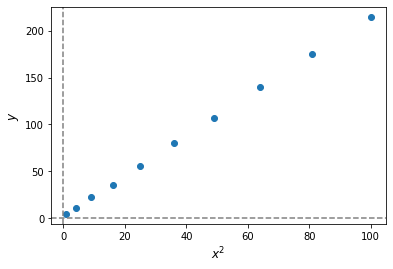

In [80]:
plt.plot(x2arr4, yarr4, 'o');
plt.xlabel('$x^2$', fontsize=12);
plt.ylabel('$y$', fontsize=12);
plt.axhline(0, linestyle='--', color='gray');
plt.axvline(0, linestyle='--', color='gray');

In [82]:
k4 = yarr4[n4-1]/x2arr4[n4-1]
print('Slope estimate for proportionality =', k4)

Slope estimate for proportionality = 2.15


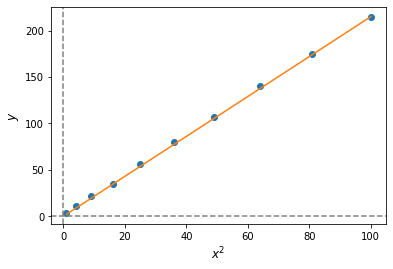

In [83]:
ypred4 = np.array([k4*x2 for x2 in x2arr4])
plt.plot(x2arr4, yarr4, 'o');
plt.plot(x2arr4, ypred4, '-');
plt.xlabel('$x^2$', fontsize=12);
plt.ylabel('$y$', fontsize=12);
plt.axhline(0, linestyle='--', color='gray');
plt.axvline(0, linestyle='--', color='gray');

Looks very good! Return to x and y and show on the original scale of the data.

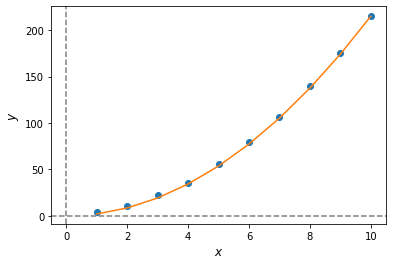

In [84]:
plt.plot(xarr4, yarr4, 'o');
plt.plot(xarr4, ypred4, '-');
plt.xlabel('$x$', fontsize=12);
plt.ylabel('$y$', fontsize=12);
plt.axhline(0, linestyle='--', color='gray');
plt.axvline(0, linestyle='--', color='gray');